<a href="https://colab.research.google.com/github/melia1702/Pertemuan-pertama/blob/main/Praktikum_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== PRAKTIKUM 1: DASAR-DASAR CITRA DIGITAL ===
Materi: Representasi Citra, Resolusi, Depth, Aspect Ratio


1. LOADING SAMPLE IMAGE

ANALISIS: Citra Asli (RGB)
Dimensi        : 512 x 512
Jumlah Channel : 3
Resolusi       : 262,144 piksel
Aspect Ratio   : 1.00
Bit Depth      : 8-bit (uint8)
Ukuran Memori  : 786,432 bytes (0.75 MB)

2. REPRESENTASI SEBAGAI MATRIKS
Nilai pixel (100,100) BGR: [ 87  74 182]
Cuplikan matriks 5x5:
[[[ 87  74 182]
  [ 80  67 175]
  [ 81  71 177]
  [ 77  67 173]
  [ 83  73 179]]

 [[ 84  74 180]
  [ 79  69 175]
  [ 81  71 177]
  [ 77  67 173]
  [ 76  68 175]]

 [[ 76  66 172]
  [ 78  68 174]
  [ 80  73 178]
  [ 77  70 175]
  [ 72  66 173]]

 [[ 71  61 167]
  [ 77  67 173]
  [ 79  72 177]
  [ 74  67 172]
  [ 79  73 180]]

 [[ 82  71 175]
  [ 77  65 171]
  [ 82  72 178]
  [ 79  69 176]
  [ 76  67 177]]]

3. KONVERSI KE GRAYSCALE

ANALISIS: Citra Grayscale
Dimensi        : 512 x 512
Jumlah Channel : 1
Resolusi       : 262,144 piksel
Aspect Ratio   : 1.00
Bit Depth 

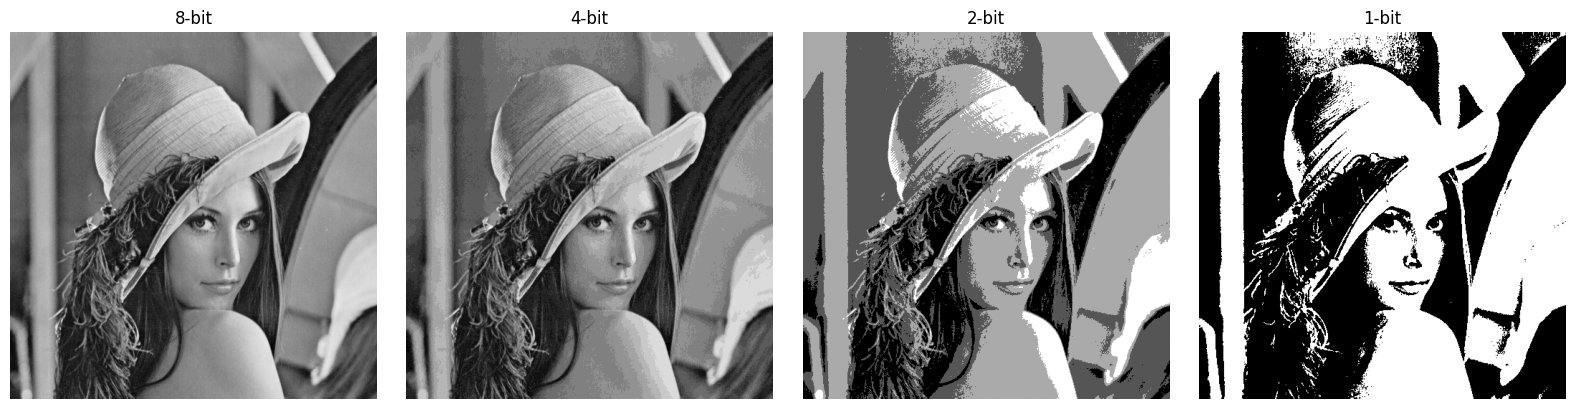


5. PENGARUH ASPECT RATIO


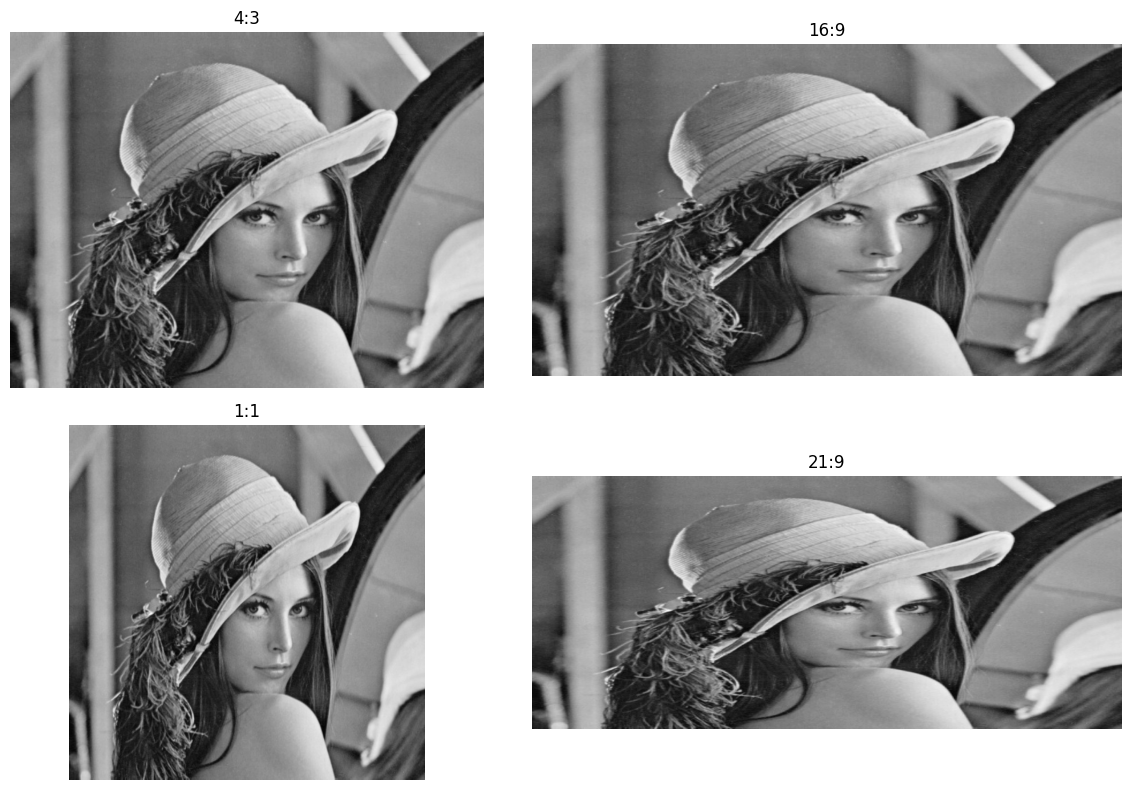


6. SEPARASI CHANNEL WARNA


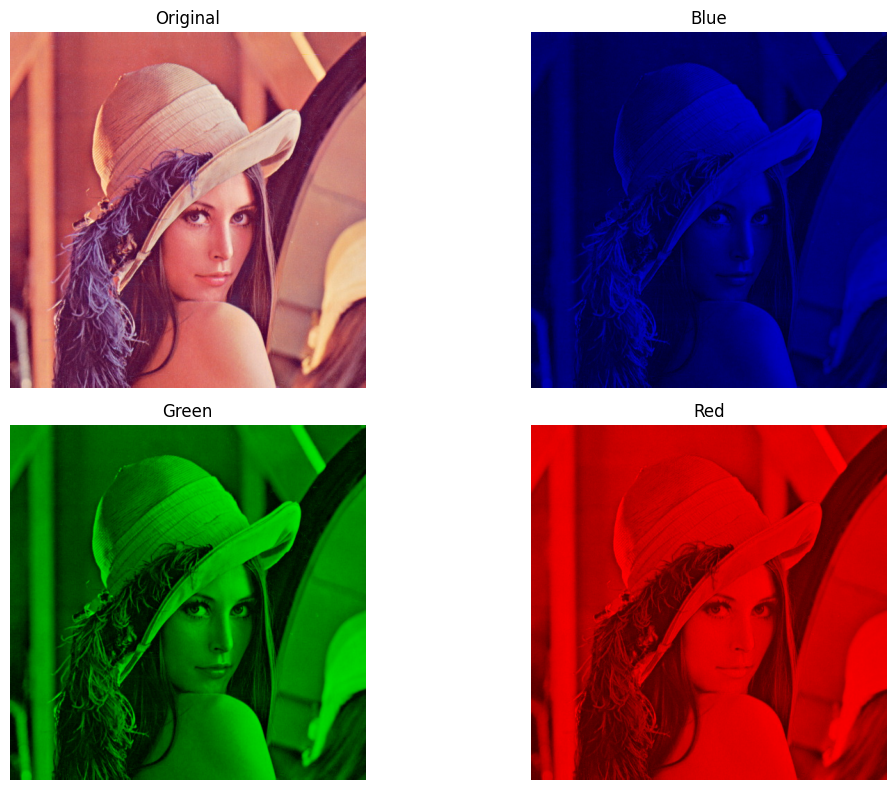


7. ANALISIS HISTOGRAM


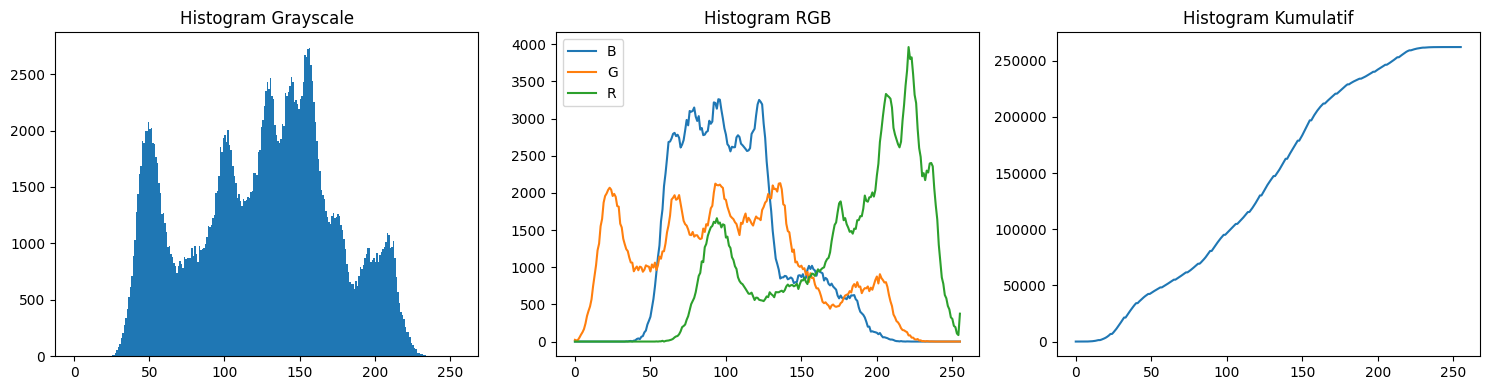


8. ANALISIS UKURAN MEMORI
640x480 Grayscale : 0.29 MB
640x480 RGB       : 0.88 MB
640x480 RGBA      : 1.17 MB
1920x1080 Grayscale : 1.98 MB
1920x1080 RGB       : 5.93 MB
1920x1080 RGBA      : 7.91 MB
3840x2160 Grayscale : 7.91 MB
3840x2160 RGB       : 23.73 MB
3840x2160 RGBA      : 31.64 MB

=== PRAKTIKUM SELESAI ===


In [ ]:
# ============================================
# PRAKTIKUM 1: DASAR-DASAR CITRA DIGITAL
# ============================================

import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image

print("=== PRAKTIKUM 1: DASAR-DASAR CITRA DIGITAL ===")
print("Materi: Representasi Citra, Resolusi, Depth, Aspect Ratio\n")

# =============== FUNGSI BANTU ===============
def download_sample_image():
    """Download sample image from internet"""
    url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg"
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        return cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    except:
        raise RuntimeError("Gagal mengunduh gambar. Periksa koneksi internet.")

def analyze_image_properties(img, name="Image"):
    """Analyze and display image properties"""
    if len(img.shape) == 2:
        height, width = img.shape
        channels = 1
    else:
        height, width, channels = img.shape

    resolution = width * height
    aspect_ratio = width / height
    depth = img.dtype.itemsize * 8

    print(f"\n{'='*40}")
    print(f"ANALISIS: {name}")
    print(f"{'='*40}")
    print(f"Dimensi        : {width} x {height}")
    print(f"Jumlah Channel : {channels}")
    print(f"Resolusi       : {resolution:,} piksel")
    print(f"Aspect Ratio   : {aspect_ratio:.2f}")
    print(f"Bit Depth      : {depth}-bit ({img.dtype})")

    memory_bytes = img.size * img.dtype.itemsize
    print(f"Ukuran Memori  : {memory_bytes:,} bytes ({memory_bytes/1024/1024:.2f} MB)")

    if channels == 1:
        print(f"Min Intensitas : {img.min()}")
        print(f"Max Intensitas : {img.max()}")
        print(f"Rata-rata      : {img.mean():.2f}")
        print(f"Standar Dev    : {img.std():.2f}")

def display_image_grid(images, titles, rows, cols, figsize=(15, 10)):
    """Display multiple images in a grid"""
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()

    for i, (img, title) in enumerate(zip(images, titles)):
        if len(img.shape) == 2:
            axes[i].imshow(img, cmap='gray')
        else:
            axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[i].set_title(title)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


# ================= MAIN PRAKTIKUM =================

# 1. LOAD DAN ANALISIS CITRA
print("\n1. LOADING SAMPLE IMAGE")
original_img = download_sample_image()
analyze_image_properties(original_img, "Citra Asli (RGB)")

# 2. REPRESENTASI MATRIKS
print("\n2. REPRESENTASI SEBAGAI MATRIKS")
x, y = 100, 100
print(f"Nilai pixel ({x},{y}) BGR:", original_img[x, y])
print("Cuplikan matriks 5x5:")
print(original_img[100:105, 100:105])

# 3. KONVERSI GRAYSCALE
print("\n3. KONVERSI KE GRAYSCALE")
gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
analyze_image_properties(gray_img, "Citra Grayscale")

# 4. ANALISIS BIT DEPTH
print("\n4. PENGARUH BIT DEPTH")
img_8bit = gray_img.copy()
img_4bit = (gray_img // 16) * 16
img_2bit = (gray_img // 64) * 64
img_1bit = (gray_img > 127).astype(np.uint8) * 255

display_image_grid(
    [img_8bit, img_4bit, img_2bit, img_1bit],
    ['8-bit', '4-bit', '2-bit', '1-bit'],
    1, 4, figsize=(16, 4)
)

# 5. ANALISIS ASPECT RATIO
print("\n5. PENGARUH ASPECT RATIO")
img_4_3  = cv2.resize(gray_img, (800, 600))
img_16_9 = cv2.resize(gray_img, (800, 450))
img_1_1  = cv2.resize(gray_img, (600, 600))
img_21_9 = cv2.resize(gray_img, (840, 360))

display_image_grid(
    [img_4_3, img_16_9, img_1_1, img_21_9],
    ['4:3', '16:9', '1:1', '21:9'],
    2, 2, figsize=(12, 8)
)

# 6. SEPARASI CHANNEL WARNA
print("\n6. SEPARASI CHANNEL WARNA")
b, g, r = cv2.split(original_img)
zeros = np.zeros_like(b)

blue  = cv2.merge([b, zeros, zeros])
green = cv2.merge([zeros, g, zeros])
red   = cv2.merge([zeros, zeros, r])

display_image_grid(
    [original_img, blue, green, red],
    ['Original', 'Blue', 'Green', 'Red'],
    2, 2, figsize=(12, 8)
)

# 7. HISTOGRAM
print("\n7. ANALISIS HISTOGRAM")
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.hist(gray_img.ravel(), bins=256, range=(0, 256))
plt.title("Histogram Grayscale")

plt.subplot(1, 3, 2)
for i, c in enumerate(['b', 'g', 'r']):
    plt.plot(cv2.calcHist([original_img], [i], None, [256], [0, 256]), label=c.upper())
plt.legend()
plt.title("Histogram RGB")

plt.subplot(1, 3, 3)
plt.plot(np.cumsum(np.histogram(gray_img.ravel(), 256)[0]))
plt.title("Histogram Kumulatif")

plt.tight_layout()
plt.show()

# 8. ANALISIS MEMORI
print("\n8. ANALISIS UKURAN MEMORI")
resolutions = [(640,480), (1920,1080), (3840,2160)]
formats = {'Grayscale':1, 'RGB':3, 'RGBA':4}

for w, h in resolutions:
    for fmt, ch in formats.items():
        mem = w * h * ch
        print(f"{w}x{h} {fmt:<10}: {mem/1024/1024:.2f} MB")

print("\n=== PRAKTIKUM SELESAI ===")
